# Monte Carlo Methods

In [1]:
# Load the necessary packages for this section.
using Plots
using Random

## The Power of Simulation

Many problems in math and science are too complex to solve with direct formulas. **Monte Carlo methods** provide a powerful alternative: instead of solving the problem analytically, we simulate it. By running many experiments that involve random chance and averaging the results, we can get surprisingly accurate estimates of probabilities, averages, or other quantities.

As a first example, let's consider a simple question: on average, how many times must you roll a standard die to get a 6? We can simulate this experiment thousands of times and find the average.

Average rolls to get a 6 = 6.0582


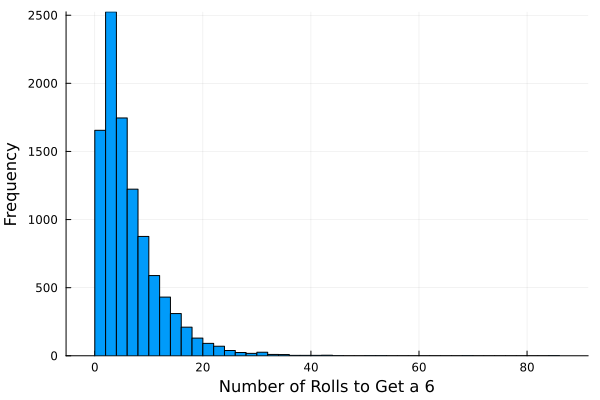

In [2]:
# Set the number of experiments to run.
ntrials = 10000

# This vector will store the result (number of rolls) of each experiment.
rolls_to_get_a_six = Int[]

# Main loop: run the experiment 'ntrials' times.
for i in 1:ntrials
    nrolls = 0
    # Keep rolling until we get a 6.
    while true
        nrolls += 1
        roll = rand(1:6)
        if roll == 6
            break # Exit the while loop once a 6 is found.
        end
    end
    # Record how many rolls it took for this trial.
    push!(rolls_to_get_a_six, nrolls)
end

# Calculate the average number of rolls across all trials.
average_rolls = sum(rolls_to_get_a_six) / ntrials
println("Average rolls to get a 6 = ", average_rolls)

# Visualize the distribution of the results.
histogram(rolls_to_get_a_six, 
          bins=50,
          label=nothing,
          xlabel="Number of Rolls to Get a 6",
          ylabel="Frequency")

### Simulating Card Games

To simulate card games, we need a way to represent a deck of cards. A standard 52-card deck has 13 ranks (Ace, 2, ..., King) and 4 suits. We can map each card to a unique integer from 1 to 52. For instance:
- 1-13: Ace to King of Clubs ♣️
- 14-26: Ace to King of Diamonds ♦️
- 27-39: Ace to King of Hearts ♥️
- 40-52: Ace to King of Spades ♠️

With this system, we can use integer division and the remainder operator to determine any card's rank and suit.

In [3]:
# The rank is determined by the card's position within a 13-card suit.
# `(card - 1) % 13` gives a 0-12 result, so we add 1.
function card_rank(card)
    return (card - 1) % 13 + 1
end

# The suit is determined by which 13-card block the card is in.
# `(card - 1) ÷ 13` gives a 0-3 result, so we add 1.
function card_suit(card)
    return (card - 1) ÷ 13 + 1
end

# Let's verify our functions by listing the rank and suit for all 52 cards.
deck = 1:52
[card_rank.(deck) card_suit.(deck)]

52×2 Matrix{Int64}:
  1  1
  2  1
  3  1
  4  1
  5  1
  6  1
  7  1
  8  1
  9  1
 10  1
 11  1
 12  1
 13  1
  ⋮  
  2  4
  3  4
  4  4
  5  4
  6  4
  7  4
  8  4
  9  4
 10  4
 11  4
 12  4
 13  4

Dealing cards requires sampling *without replacement*—you can't deal the same card twice. A simple way to model this is to first shuffle the entire deck and then deal cards from the top. The `randperm(n)` function from the `Random` package is perfect for this; it generates a random permutation of the integers from 1 to `n`.

In [4]:
# Shuffle the deck by creating a random permutation of the numbers 1-52.
shuffled_deck = randperm(52)

# Deal a 5-card poker hand by taking the first 5 cards from the shuffled deck.
hand = shuffled_deck[1:5]

# Display the ranks and suits of the cards in our hand.
[card_rank.(hand) card_suit.(hand)]

5×2 Matrix{Int64}:
  9  3
  7  2
 11  2
  5  4
  2  4

### Example: Probability of a Flush

In poker, a **flush** is a hand where all five cards have the same suit. What is the probability of being dealt a flush? We can estimate this with a Monte Carlo simulation: deal a large number of hands and count what fraction of them are flushes.

In [5]:
ntrials = 100_000 # Use underscores for readability in large numbers.
nflush = 0

for itrial in 1:ntrials
    # Shuffle and deal a new hand for each trial.
    shuffled_deck = randperm(52)
    hand = shuffled_deck[1:5]
    
    # Get the suits of the five cards in the hand.
    suits = card_suit.(hand)
    
    # A hand is a flush if all the suits are the same.
    same_suit = true
    for i = 2:5
        if suits[i] ≠ suits[1]
            same_suit = false
            break
        end
    end
    if same_suit
        nflush += 1
    end
end

approx_probability = nflush / ntrials

0.00205

This is a problem that can also be solved with combinatorics, which gives us a way to check our simulation's accuracy. The exact answer is the number of ways to choose a suit (4), times the number of ways to choose 5 cards from that suit's 13 ranks, divided by the total number of possible 5-card hands.

In [6]:
# The binomial(n, k) function calculates "n choose k".
# (Ways to pick a suit) * (Ways to pick 5 cards of that suit) / (Total ways to pick 5 cards)
exact_probability = 4 * binomial(13, 5) / binomial(52, 5)

0.0019807923169267707

## Estimating $\pi$ by Throwing Darts

Monte Carlo methods can even be used for numerical integration to approximate areas and volumes. Imagine a square dartboard with side length 2, centered at the origin, with a circle of radius 1 inscribed within it. 

If you throw darts randomly at the board, the ratio of darts that land inside the circle to the total number of darts thrown should approximate the ratio of the two areas:

$$
\frac{\text{hits}}{\text{total throws}} \approx \frac{\text{Area}_\text{circle}}{\text{Area}_\text{square}} = \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}
$$

By rearranging this, we can get an estimate for $\pi$:

$$
\pi \approx 4 \times \frac{\text{hits}}{\text{total throws}}
$$

Estimated value for π = 3.196


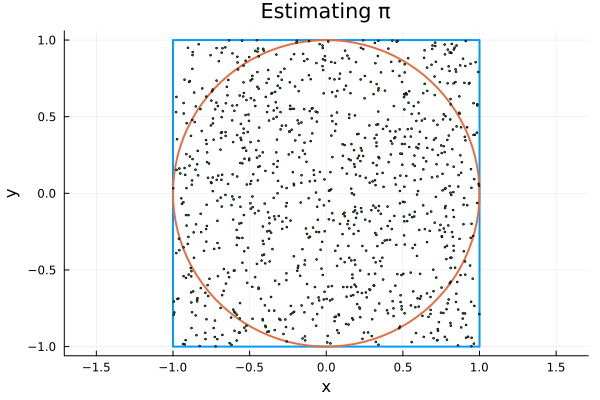

In [7]:
n = 1000 # Number of darts to throw.

# Generate random x and y coordinates between -1 and 1 for each dart.
x = 2rand(n) .- 1
y = 2rand(n) .- 1

# A dart (x,y) is a "hit" if it's inside the unit circle, i.e., x² + y² ≤ 1.
hits = 0
for i = 1:n
    if x[i]^2 + y[i]^2 ≤ 1
        hits += 1
    end
end

# Estimate pi using our formula.
approx_pi = 4 * hits / n
println("Estimated value for π = ", approx_pi)

# Visualize the simulation.
plot(aspect_ratio=:equal, legend=:none)
plot!([-1,1,1,-1,-1], [-1,-1,1,1,-1], linewidth=2)  # Draw square
theta = 2π*(0:100)./100               
plot!(cos.(theta), sin.(theta), linewidth=2)        # Draw circle
plot!(x, y, seriestype=:scatter, markersize=1)
plot!(xlabel="x", ylabel="y", title="Estimating π")

## Example: Random Walk

A **random walk** is a path traced by a series of random steps. We can simulate one with a simple algorithm:

- Start at the origin $(0,0)$ on a 2D grid.
- At each step, randomly choose a direction (up, down, left, or right) and move one unit.
- Continue until the path goes beyond the edge of a predefined boundary.

In [8]:
function random_walk(boundary_size)
    # Start the walk at the origin.
    x_path = [0]
    y_path = [0]
    
    # Define the four possible steps as changes in (x, y).
    #               up      down    right   left
    steps_x = [     0,      0,      1,     -1]
    steps_y = [     1,     -1,      0,      0]
    
    # Continue walking as long as the current position is within the boundary.
    while abs(x_path[end]) < boundary_size && abs(y_path[end]) < boundary_size
        # Randomly choose a direction (1=up, 2=down, 3=right, 4=left).
        direction = rand(1:4)
        
        # Take a step in the chosen direction and append the new coordinates.
        push!(x_path, last(x_path) + steps_x[direction])
        push!(y_path, last(y_path) + steps_y[direction])
    end
    
    return x_path, y_path
end

random_walk (generic function with 1 method)

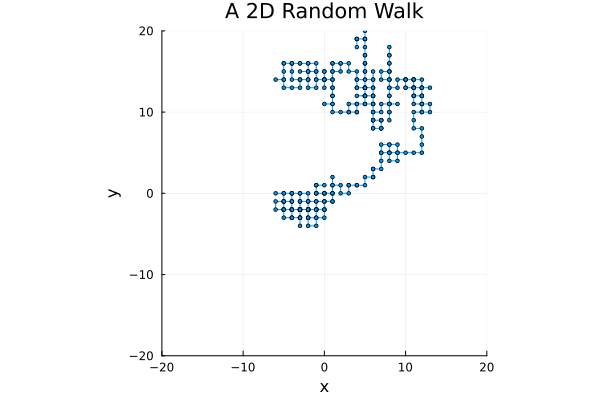

In [9]:
# Set the boundary for the walk.
n = 20

# Generate the path.
x, y = random_walk(n)

# Plot the path of the random walk.
plot(x, y,
     markershape = :circle, 
     markersize = 2, 
     legend=:none,
     xlabel="x",
     ylabel="y",
     title="A 2D Random Walk",
     aspect_ratio=:equal,
     xlims=(-n, n),
     ylims=(-n, n))